In [3]:
import nibabel as nib
import matplotlib.pyplot as plt
import os
import numpy as np

# import pydicom
# from pydicom.data import get_testdata_file
# from matplotlib.colors import ListedColormap
import glob

In [4]:
np.__version__

'1.25.0'

In [2]:
os.chdir('/Users/kuko/Developer/School/DP/data/VS-dicom-broken/')
os.listdir()

['vs_gk_3_t2',
 '.DS_Store',
 'vs_gk_1_t1',
 'vs_gk_115_t1',
 'vs_gk_131_t1',
 'vs_gk_3_t1',
 'vs_gk_1_t2',
 'vs_gk_131_t2',
 'vs_gk_115_t2']

In [88]:
data = sorted((glob.glob('vs_gk_1_t1/IMG*.dcm')))
len(data)

120

In [89]:
expected = '1.5'
old_val = pydicom.dcmread(data[0])[0x0020, 0x0032].value[2]
for file in data[1:]:
    # print(file)
    ds = pydicom.dcmread(file)
    new_val = ds[0x0020, 0x0032].value[2]
    diff = new_val - old_val
    # print(diff)
    old_val = new_val
    # print(file, ds[0x0020, 0x0032])
    if str(diff) != expected:
        print(file, diff)

vs_gk_1_t1/IMG0000000051.dcm 1.5000000000000018
vs_gk_1_t1/IMG0000000062.dcm 1.50000000000004
vs_gk_1_t1/IMG0000000063.dcm 1.49999999999996
vs_gk_1_t1/IMG0000000073.dcm 1.4999999999999982


# Playground

In [6]:
colorarray = [
    [0/256, 0/256, 0/256, 1], # Background
    # [0/256, 250/256, 131/256, 1], 
    # [0/256, 132/256, 251/256, 1], 
    [252/256, 56/256, 56/256, 1], 
]
cmap = ListedColormap(colorarray)

In [3]:
path_source = '/Users/kuko/Developer/School/DP/data/crossmoda2022_training/training_source/'
path_target = '/Users/kuko/Developer/School/DP/data/crossmoda2022_training/training_target/'
#print(os.listdir(path))

t1_cross = nib.load(path_source +'crossmoda2021_ldn_2_ceT1.nii').get_fdata()
label_cross = nib.load(path_source +'crossmoda2021_ldn_2_Label.nii').get_fdata()
t2_cross = nib.load(path_target +'crossmoda2021_ldn_107_hrT2.nii').get_fdata()
print(t1_cross.shape)
print(label_cross.shape, np.unique(label_cross))
print(t2_cross.shape)

FileNotFoundError: No such file or no access: '/Users/kuko/Developer/School/DP/data/crossmoda2022_training/training_source/crossmoda2021_ldn_2_ceT1.nii'

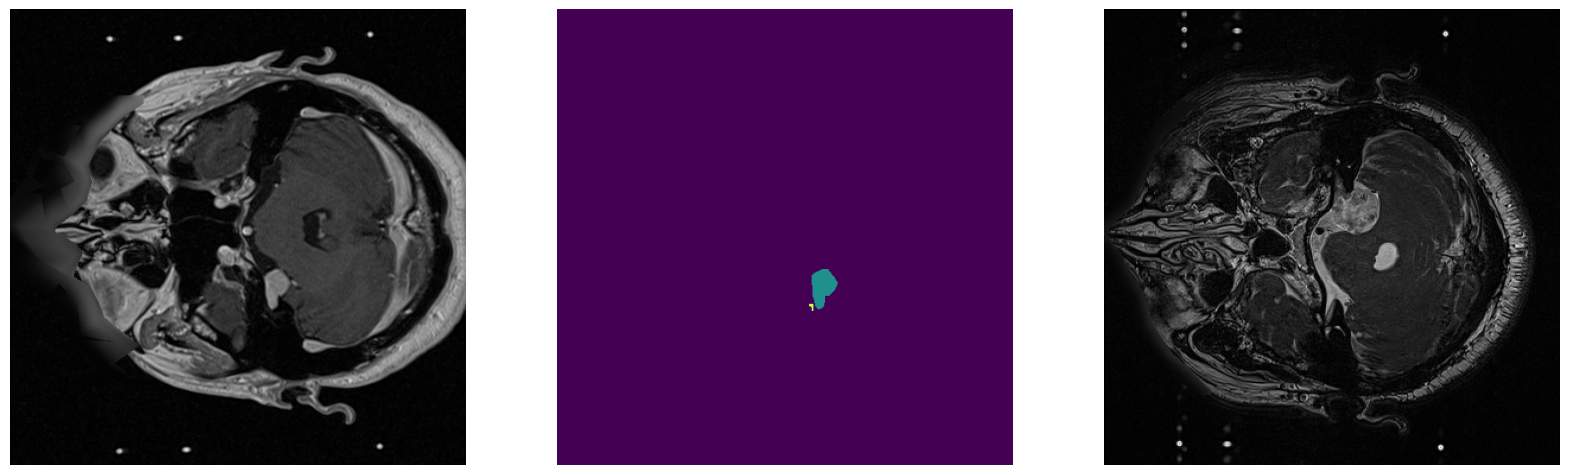

In [55]:
slice = 35
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 10))
ax1.imshow(t1_cross[:,:,slice], cmap = 'gray')
ax1.axis('off')
ax2.imshow(label_cross[:,:,slice])
ax2.axis('off')
ax3.imshow(t2_cross[:,:,20], cmap = 'gray')
ax3.axis('off')
plt.show()

In [68]:
path_source = '/Users/kuko/Developer/School/DP/data/crossmoda2022_training/training_source/'
path_target = '/Users/kuko/Developer/School/DP/data/crossmoda2022_training/training_target/'
#print(os.listdir(path))

t1_cross = nib.load(path_source +'crossmoda2021_ldn_12_ceT1.nii.gz').get_fdata()
label_cross = nib.load(path_source +'crossmoda2021_ldn_12_Label.nii.gz').get_fdata()
print(t1_cross.shape)
print(label_cross.shape, np.unique(label_cross))

(512, 512, 120)
(512, 512, 120) [0. 1. 2.]


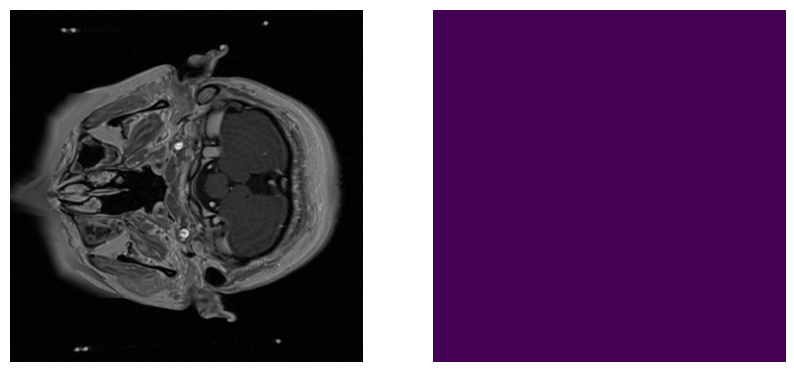

In [69]:
slice = 35
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 10))
ax1.imshow(t1_cross[:,:,slice], cmap = 'gray')
ax1.axis('off')
ax2.imshow(label_cross[:,:,slice])
ax2.axis('off')
plt.show()

In [56]:
path_source = '/Users/kuko/Developer/School/DP/data/VS-176-205/vs_gk_176/'
print(os.listdir(path_source))

t1 = nib.load(path_source +'vs_gk_t1_refT2.nii.gz').get_fdata()
t2 = nib.load(path_source +'vs_gk_t2_refT2.nii.gz').get_fdata()
label = nib.load(path_source +'vs_gk_seg_refT2.nii.gz').get_fdata()
print(t1.shape)
print(t2.shape)
print(label.shape, np.unique(label))

['vs_gk_t2_refT2.nii.gz', 'vs_gk_seg_refT2.nii.gz', 'vs_gk_t1_refT2.nii.gz']
(448, 448, 80)
(448, 448, 80)
(448, 448, 80) [0. 1.]


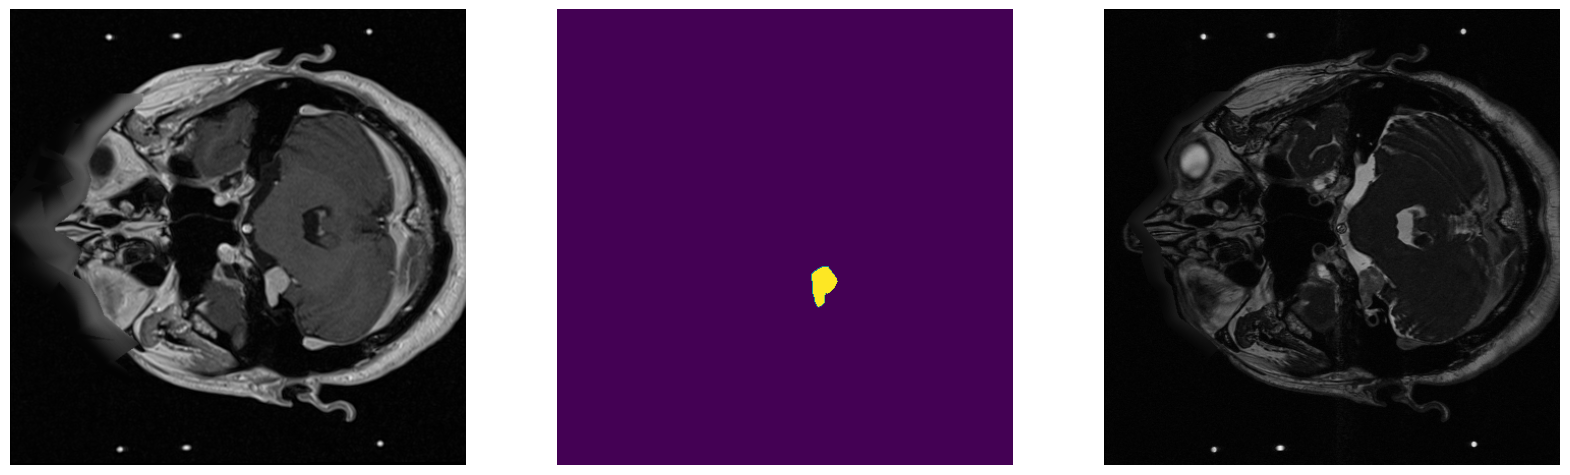

In [62]:
slice = 26
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 10))
ax1.imshow(t1[:,:,slice], cmap = 'gray')
ax1.axis('off')
ax2.imshow(label[:,:,slice])
ax2.axis('off')
ax3.imshow(t2[:,:,slice], cmap = 'gray')
ax3.axis('off')
plt.show()

In [2]:
path_source = '/Users/kuko/Downloads/GroundTruth/'
#print(os.listdir(path))

label = nib.load(path_source +'pat_1/001_Vessel-Manual-Gold-int.nii.gz').get_fdata()
print(label.shape, np.unique(label))

(448, 448, 128) [0. 1.]


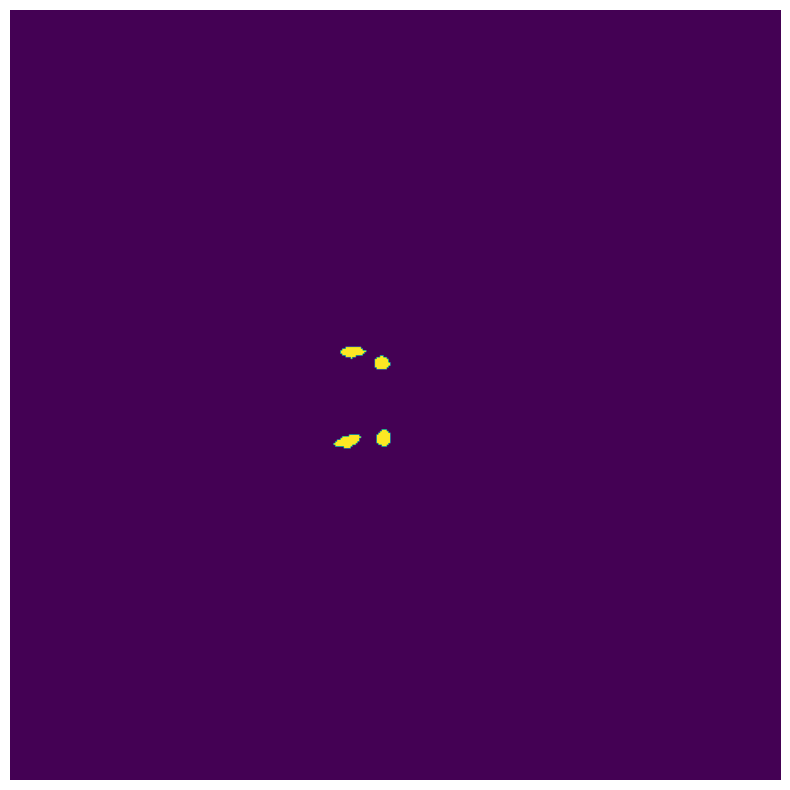

In [7]:
slice = 32
fig, (ax1) = plt.subplots(1, 1, figsize = (20, 10))
ax1.imshow(label[:,:,0])
ax1.axis('off')
plt.show()

In [78]:
dicom_path='/Users/kuko/Developer/School/DP/VS-SEG-061/dicom/'
t1_path = dicom_path + 'vs_gk_061_t1/'
t2_path = dicom_path + 'vs_gk_061_t2/'
#print(t1_path)
#print(t2_path)

t1_files = data_manager.get_files(t1_path)
t1_files = sorted(t1_files)
#print(t1_files)
t2_files = data_manager.get_files(t2_path)
t2_files = sorted(t2_files)
#print(t2_files)

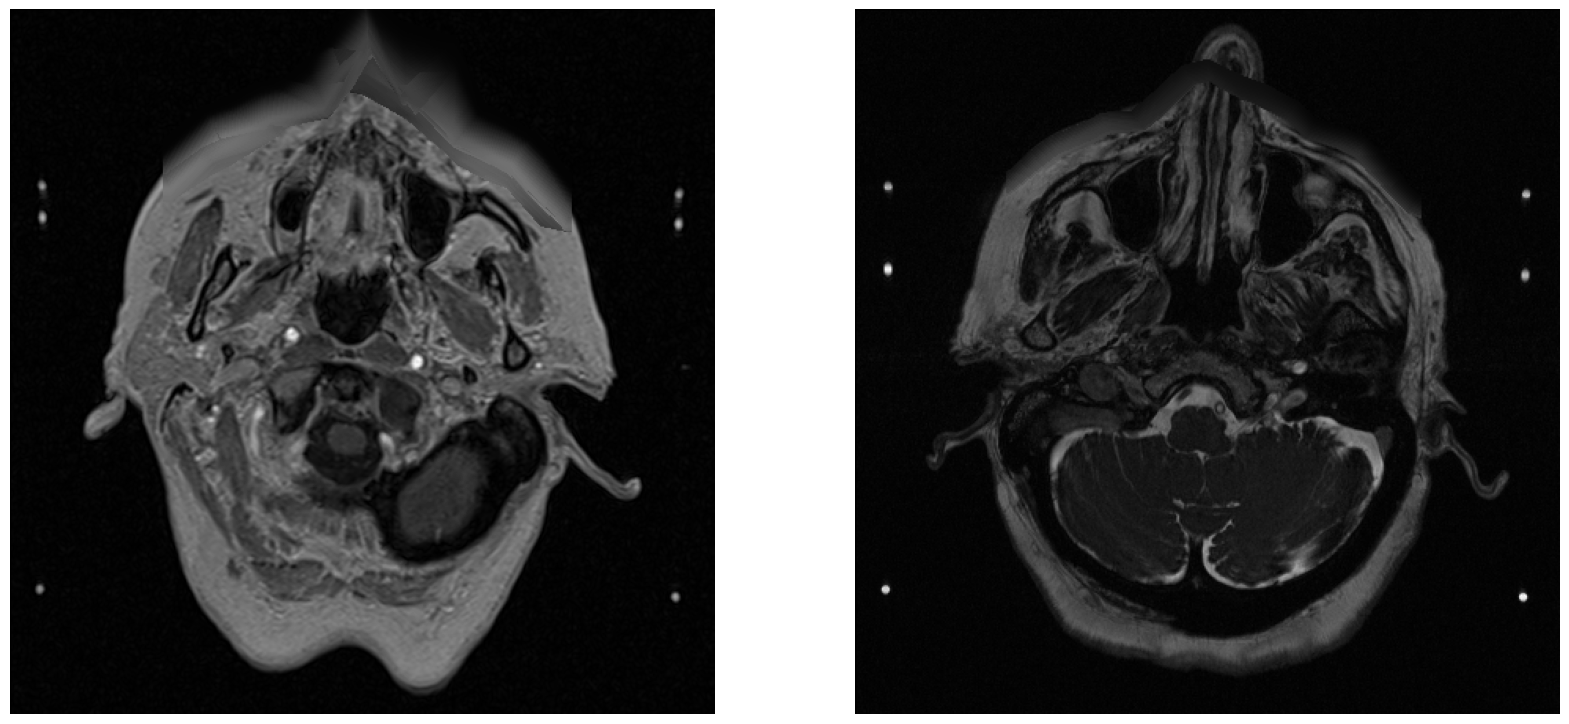

In [80]:
t1 = pydicom.dcmread(t1_files[20])
t2 = pydicom.dcmread(t2_files[21])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
ax1.imshow(t1.pixel_array, cmap = 'gray')
ax1.axis('off')
ax2.imshow(t2.pixel_array, cmap = 'gray')
ax2.axis('off')
plt.show()

In [58]:
path_source = '/Users/kuko/Developer/School/DP/data/VS-nii-test/vs_gk_173/'
print(os.listdir(path_source))

t1 = nib.load(path_source +'vs_gk_t1_refT2.nii.gz').get_fdata()
t2 = nib.load(path_source +'vs_gk_t2_refT2.nii.gz').get_fdata()
label = nib.load(path_source +'vs_gk_seg_refT2.nii.gz').get_fdata()
print(t1.shape)
print(label.shape, np.unique(label))
print(t2.shape)

['vs_gk_t2_refT2.nii.gz', 'vs_gk_seg_refT2.nii.gz', 'vs_gk_t1_refT2.nii.gz']
(448, 448, 80)
(448, 448, 80) [0. 1.]
(448, 448, 80)


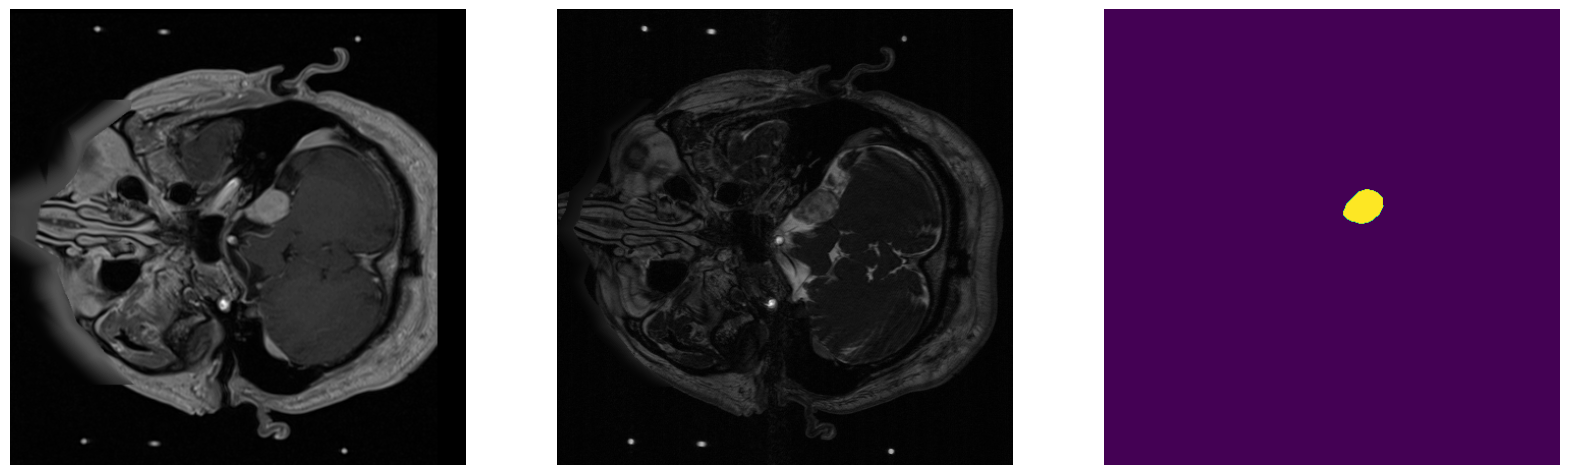

In [60]:
slice = 18
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 10))
ax1.imshow(t1[:,:,slice], cmap = 'gray')
ax1.axis('off')
ax2.imshow(t2[:,:,slice], cmap = 'gray')
ax2.axis('off')
ax3.imshow(label[:,:,slice])
ax3.axis('off')
plt.show()

In [5]:
path_source = '/Users/kuko/Developer/School/DP/data/VS-206-238/vs_gk_211/'
print(os.listdir(path_source))

t1 = nib.load(path_source +'vs_gk_t1_refT2.nii.gz').get_fdata()
t2 = nib.load(path_source +'vs_gk_t2_refT2.nii.gz').get_fdata()
label = nib.load(path_source +'vs_gk_struc1_AN_refT2.nii.gz').get_fdata()
label2 = nib.load(path_source +'vs_gk_struc2_Cochlea_refT2.nii.gz').get_fdata()
print(t1.shape)
print(t2.shape)
print(label.shape, np.unique(label))
print(label2.shape, np.unique(label2))

['vs_gk_t2_refT2.nii.gz', 'vs_gk_struc1_AN_refT2.nii.gz', 'vs_gk_struc2_cochlea_refT2.nii.gz', 'vs_gk_t1_refT2.nii.gz']
(448, 448, 80)
(448, 448, 80)
(448, 448, 80) [0. 1.]
(448, 448, 80) [0. 1.]


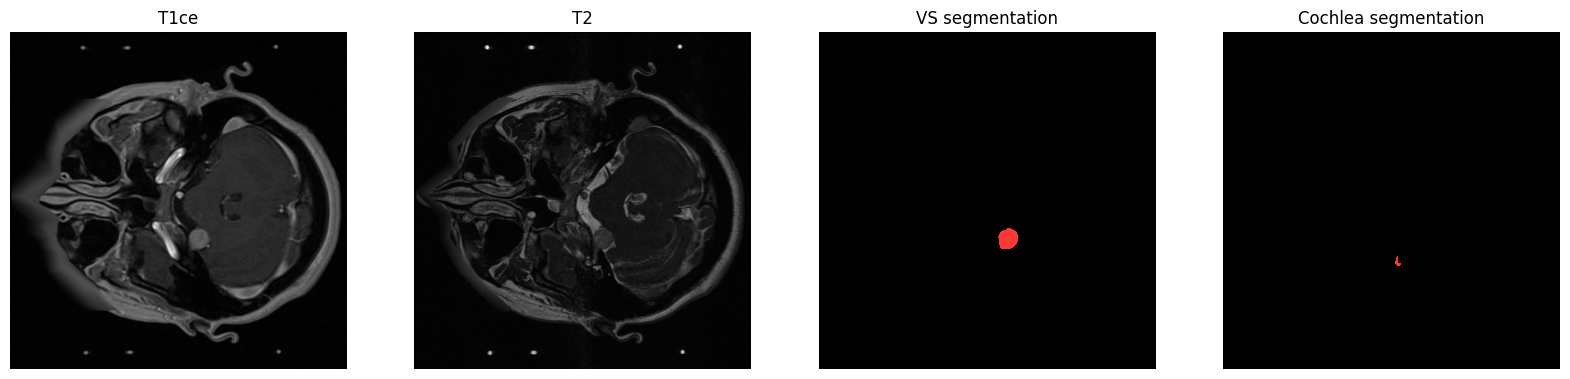

In [18]:
slice = 27
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 10))
ax1.imshow(t1[:,:,slice], cmap='gray')
ax1.axis('off')
ax1.set_title('T1ce')
ax2.imshow(t2[:,:,slice], cmap='gray')
ax2.axis('off')
ax2.set_title('T2')
ax3.imshow(label[:,:,slice], cmap=cmap)
ax3.axis('off')
ax3.set_title('VS segmentation')
ax4.imshow(label2[:,:,slice], cmap=cmap)
ax4.axis('off')
ax4.set_title('Cochlea segmentation')
plt.show()

In [4]:
path_source = '/Users/kuko/Developer/School/DP/data/VS-144-175/vs_gk_145/'
print(os.listdir(path_source))

t1 = nib.load(path_source +'vs_gk_t1_refT2.nii.gz').get_fdata()
t2 = nib.load(path_source +'vs_gk_t2_refT2.nii.gz').get_fdata()
label = nib.load(path_source +'vs_gk_seg_refT2.nii.gz').get_fdata()
print(t1.shape)
print(t2.shape)
print(label.shape, np.unique(label))

['vs_gk_t2_refT2.nii.gz', 'vs_gk_seg_refT2.nii.gz', 'vs_gk_t1_refT2.nii.gz']
(448, 448, 80)
(448, 448, 80)
(448, 448, 80) [0. 1.]


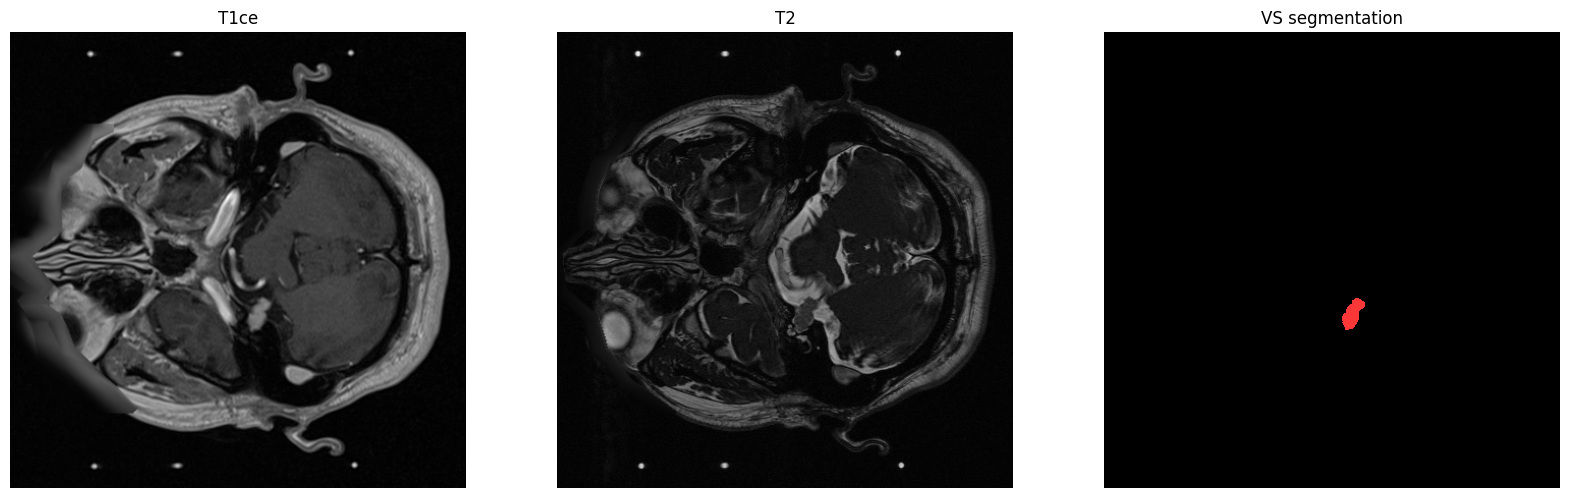

In [39]:
slice = 38
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 10))
ax1.imshow(t1[:,:,slice], cmap='gray')
ax1.axis('off')
ax1.set_title('T1ce')
ax2.imshow(t2[:,:,slice], cmap='gray')
ax2.axis('off')
ax2.set_title('T2')
ax3.imshow(label[:,:,slice], cmap=cmap)
ax3.axis('off')
ax3.set_title('VS segmentation')
plt.show()

In [9]:
path_source = '/Users/kuko/Downloads/vs_gk_145/'
print(os.listdir(path_source))

t1 = nib.load(path_source +'vs_gk_t1_refT2.nii.gz').get_fdata()
t2 = nib.load(path_source +'vs_gk_t2_refT2.nii.gz').get_fdata()
label = nib.load(path_source +'vs_gk_struc1_TV_refT2.nii.gz').get_fdata()
label2 = nib.load(path_source +'vs_gk_struc2_Cochlea_refT2.nii.gz').get_fdata()
print(t1.shape)
print(t2.shape)
print(label.shape, np.unique(label))
print(label2.shape, np.unique(label2))

['vs_gk_t2_refT2.nii.gz', 'vs_gk_struc1_TV_refT2.nii.gz', 'vs_gk_struc2_Cochlea_refT2.nii.gz', 'vs_gk_t1_refT2.nii.gz']
(448, 448, 80)
(448, 448, 80)
(448, 448, 80) [0. 1.]
(448, 448, 80) [0. 1.]


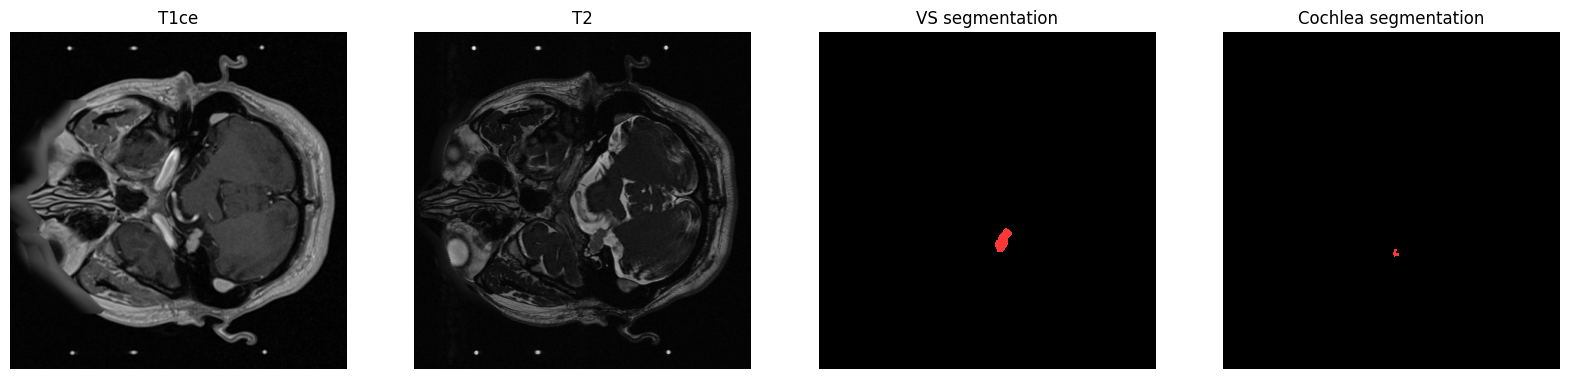

In [38]:
slice = 38
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 10))
ax1.imshow(t1[:,:,slice], cmap='gray')
ax1.axis('off')
ax1.set_title('T1ce')
ax2.imshow(t2[:,:,slice], cmap='gray')
ax2.axis('off')
ax2.set_title('T2')
ax3.imshow(label[:,:,slice], cmap=cmap)
ax3.axis('off')
ax3.set_title('VS segmentation')
ax4.imshow(label2[:,:,slice], cmap=cmap)
ax4.axis('off')
ax4.set_title('Cochlea segmentation')
plt.show()

In [71]:
path_source = '/Users/kuko/Developer/School/DP/data/VS-144-175/vs_gk_174/'
print(os.listdir(path_source))

t1 = nib.load(path_source +'vs_gk_t1_refT2.nii.gz').get_fdata()
t2 = nib.load(path_source +'vs_gk_t2_refT2.nii.gz').get_fdata()
label = nib.load(path_source +'vs_gk_seg_refT2.nii.gz').get_fdata()
print(t1.shape)
print(t2.shape)
print(label.shape, np.unique(label))

['vs_gk_t2_refT2.nii.gz', 'vs_gk_seg_refT2.nii.gz', 'vs_gk_t1_refT2.nii.gz']
(384, 384, 40)
(384, 384, 40)
(384, 384, 40) [0. 1.]


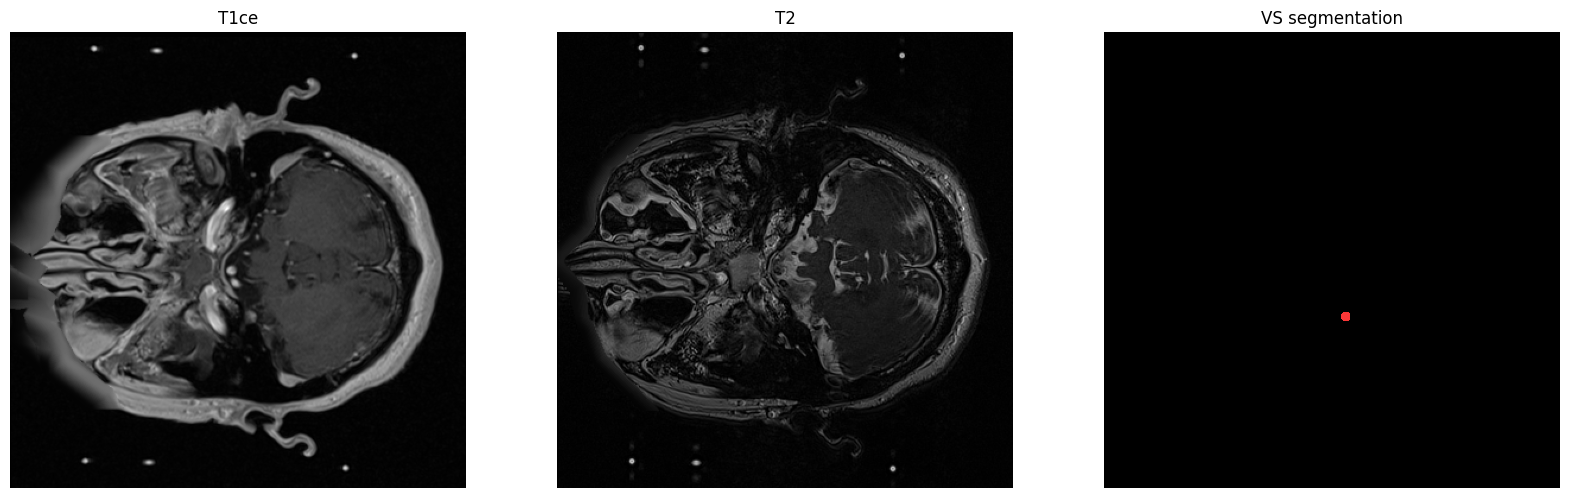

In [95]:
slice = 15
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 10))
ax1.imshow(t1[:,:,slice], cmap='gray')
ax1.axis('off')
ax1.set_title('T1ce')
ax2.imshow(t2[:,:,slice], cmap='gray')
ax2.axis('off')
ax2.set_title('T2')
ax3.imshow(label[:,:,slice], cmap=cmap)
ax3.axis('off')
ax3.set_title('VS segmentation')
plt.show()

In [61]:
a = np.zeros((384, 384, 20))

In [62]:
t1 = np.append(t1, a, axis=2)

In [63]:
t1.shape

(384, 384, 80)

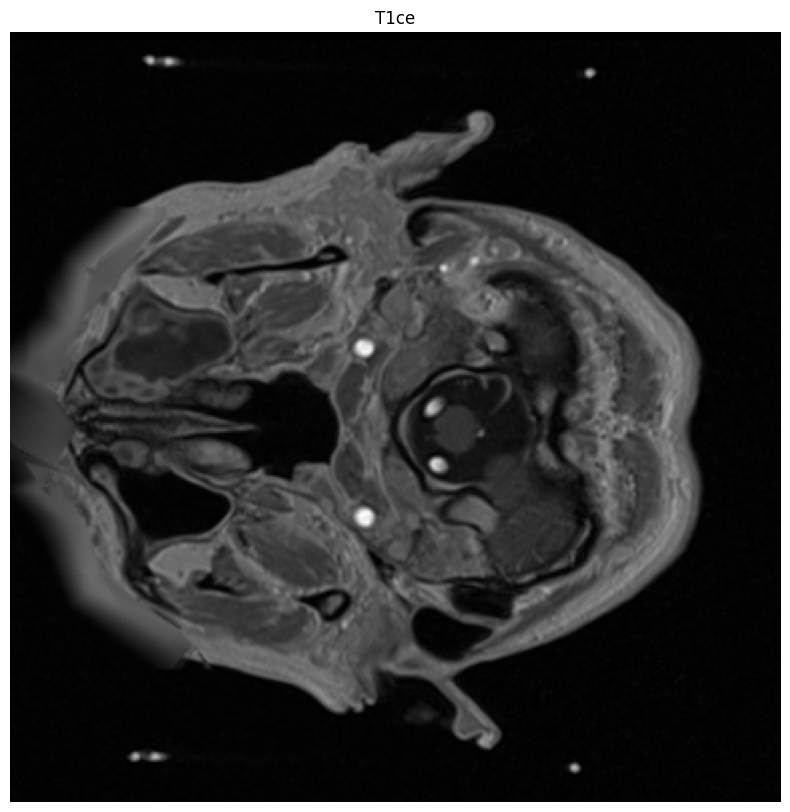

In [70]:
slice = 0
fig, (ax1) = plt.subplots(1, 1, figsize = (20, 10))
ax1.imshow(t1[:,:,slice], cmap='gray')
ax1.axis('off')
ax1.set_title('T1ce')
plt.show()

In [4]:
path_source = '/Users/kuko/Developer/School/DP/data/VS-broken/vs_gk_131/'
print(os.listdir(path_source))

t1 = nib.load(path_source +'vs_gk_t1_refT1.nii.gz').get_fdata()
t2 = nib.load(path_source +'vs_gk_t2_refT1.nii.gz').get_fdata()
label = nib.load(path_source +'vs_gk_seg_refT1.nii.gz').get_fdata()
print(t1.shape)
print(t2.shape)
print(label.shape, np.unique(label))

['vs_gk_t1_refT1.nii.gz', 'vs_gk_t2_refT1.nii.gz', 'vs_gk_seg_refT1.nii.gz']
(512, 512, 120)
(512, 512, 120)
(512, 512, 120) [0. 1.]


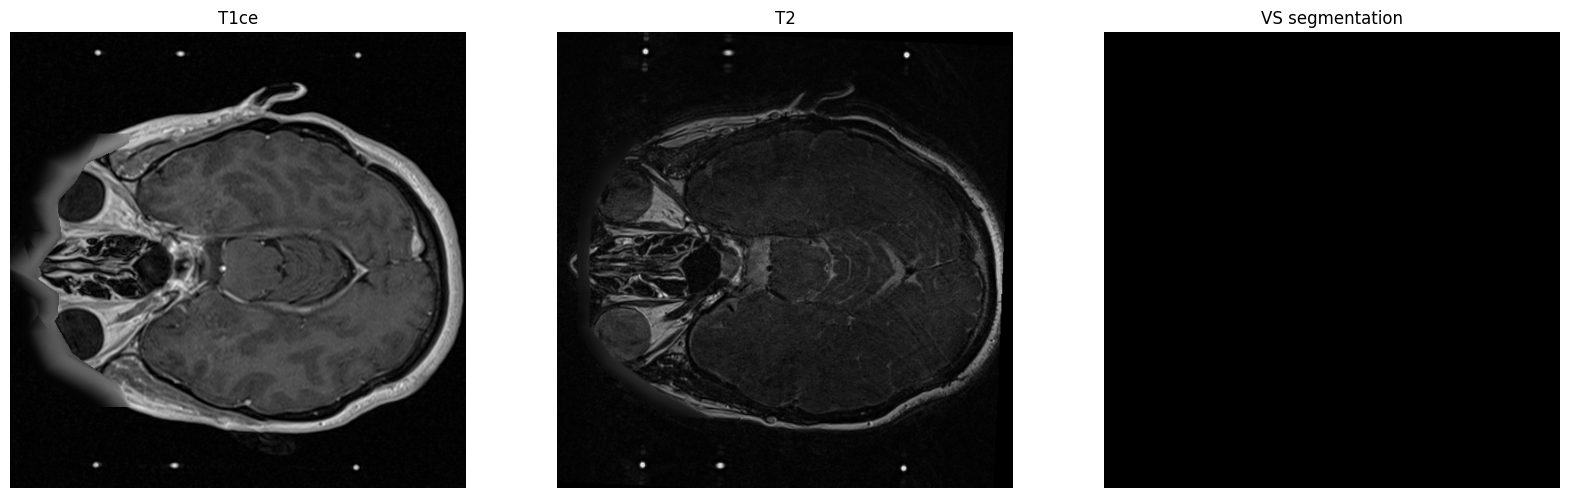

In [22]:
slice = 45

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 10))
ax1.imshow(t1[:,:,slice], cmap='gray')
ax1.axis('off')
ax1.set_title('T1ce')
ax2.imshow(t2[:,:,slice], cmap='gray')
ax2.axis('off')
ax2.set_title('T2')
ax3.imshow(label[:,:,slice], cmap=cmap)
ax3.axis('off')
ax3.set_title('VS segmentation')
plt.show()